<a href="https://colab.research.google.com/github/rkp74/Movie_Genre_Classification/blob/main/Movie_Genre_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/train.csv')
     

In [4]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [5]:
df.shape

(22579, 3)

In [6]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

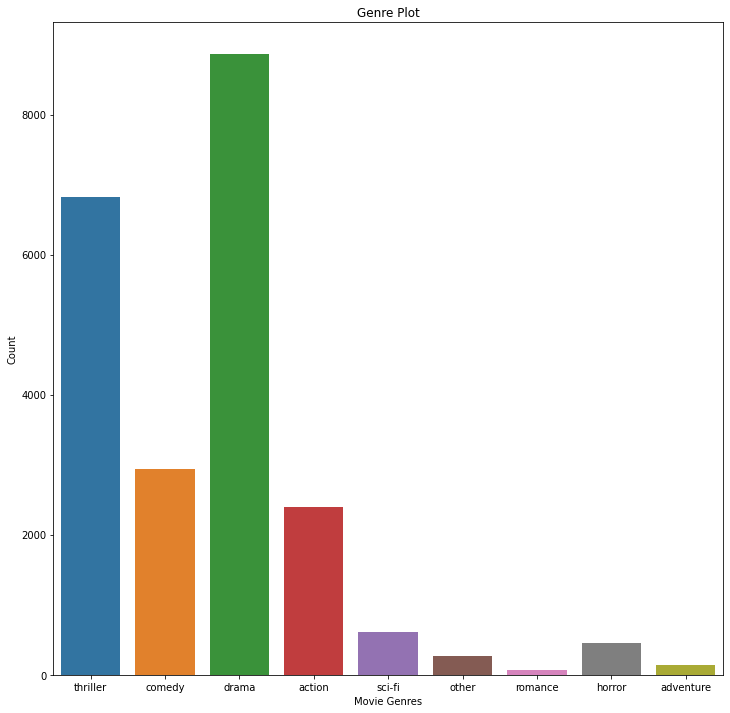

In [8]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [9]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [10]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [11]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [12]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [13]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df.shape

(22579, 2)

In [15]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [16]:

df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [17]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

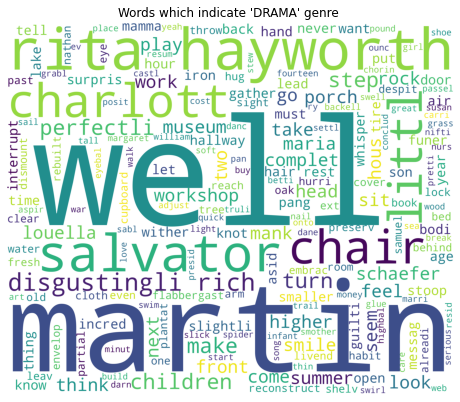

In [18]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

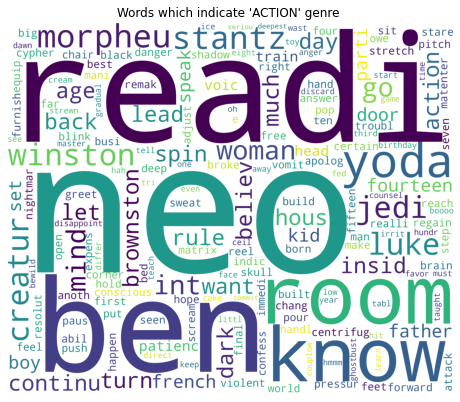

In [19]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()


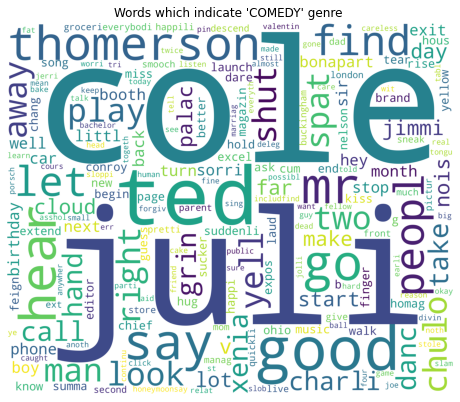

In [20]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [22]:
y = df['genre'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))
     

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [24]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
nb_y_pred = nb_classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [27]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [28]:
nb_cm


array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

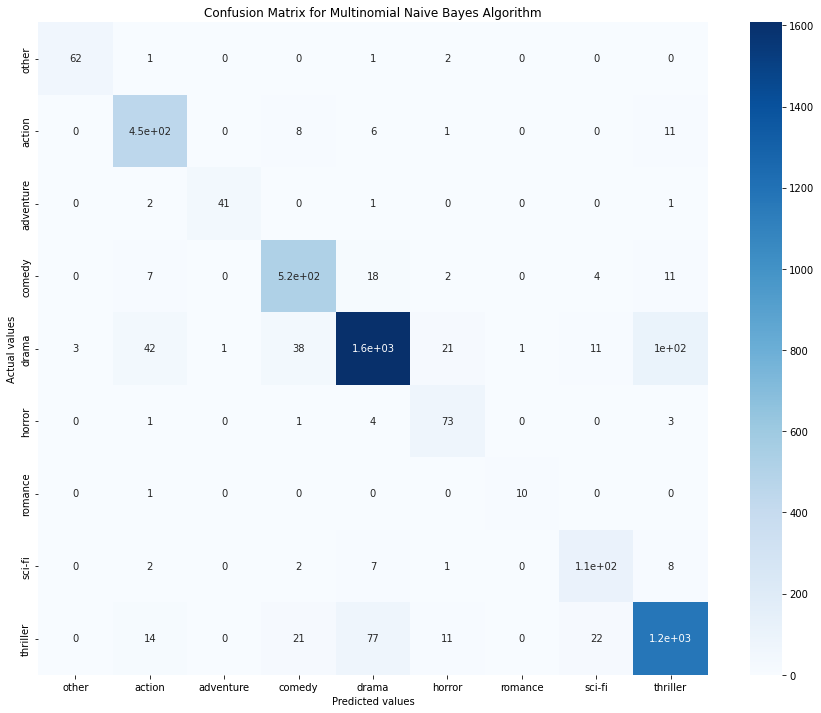

In [29]:
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [32]:

# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [33]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [34]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [35]:
from random import randint

In [37]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [38]:
test.shape

(5589, 2)

In [39]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [40]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  ancient times they said my number was unlucky. Do you believe in luck? LOGAN No Look, I'm in a hurry. HOLLY Doc'll be with you soon, Sandman. Logan and Jessica walk to one of the chairs in the waiting area and sit down next to an attractive WOMAN. WOMAN CUSTOMER Is this your first time? Logan and Jessica nod. WOMAN CUSTOMER smiling This is my third... a beat ...I did it when I turned yellow... and green. showing her palm I turned red yesterday. LOGAN looking Beautiful work. This man do them all? WOMAN CUSTOMER No. But I hear he's terrific. Have you seen any of his work? LOGAN Just one. HOLLY Doc's ready, Sandman. Logan and Jessica stand. They follow Holly into a large, shining, stainless steel room where we see MEDIUM ANGLE DOC Who looks about twenty one years old, exchanges a pointed look with Jessica. DOC It's a real privilege, Sandman. LOGAN Thanks. slightest beat I thought you'd be older. I expected a Red. DOC showing his palm the flower crystal is Red I am. LOGAN Your own

In [41]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: breaks into a nervous, ambiguous smile of welcome. REVERSE ANGLE TERRI'S POV as JP walks confidently to her table, smiling. JP Hey, babe. Thanks for coming. JP sits down opposite her. He reaches over and pats her hand. INT. MAIN ROOM, JOEY'S APT. NIGHT Joey enters the unlit main room. She glances across at the sofa. It's unoccupied. Joey puts the light on. She grimaces at the chaos of the room the piles of videos and books and crosses the room to the bedroom door. She opens the door and looks in. JOEY Terri, we can't bunk up every night! People will ... The bedroom is empty, nobody on the bed. JOEY off ... talk. ... Terri? Joey leaves the door and walks back into the main room. She looks around and then walks over to the phone. Something has caught her eye. ANGLE BY PHONE A hand scrawled note by the phone reads ENJOY MONTEREY, YOU LIAR. JOEY registers the note. 57 JOEY Oh shit. Joey shakes her head sadly. What can she do? It's the early hours of the morning. She has no idea whe

In [42]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: cking the cylinder of Pembry's gun, holds up one finger to Tate. SGT. TATE into radio Pembry got off one round there's a chance Lecter was hit. We heard a total of three shots fired, so he's got four left... He's got a knife, too. CUT TO EXT. STREET IN FRONT OF COURTHOUSE NIGHT VARIOUS ANGLES on a floodlit scene of barely controlled pandemonium. Flashing red lights, men shouting commands, SIRENS in the distance. SWAT members, in full gear, leap from a black van... fan out... swarm up the steps... EMS orderlies unload a gurney from an ambulance... Cops kneel for cover behind cars, aiming guns and rifles up at the windows... CUT TO INT. HISTORICAL SOCIETY ROOM NIGHT A trio of EMS orderlies work fast over the body, already strapped on its gurney. They bandage a big plastic airway into place, over the butchered face, checking for a pulse at the neck. Young Murray crouches, sickened, gripping a bloody fist. MURRAY You're just fine, Pembry, lookin' good, buddy, you're gonna make it..

In [43]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: okie ducks. Sefton doesn't even bat an eyelash. SEFTON You must have been some tail gunner! to Cookie Go ahead, Cookie. STOSH Come on, let's get that mail. Anything for Stanislaus Kuzawa? MARKO At ease! At ease! As Marko calls out the names he hands out the letters. Some of the men open them immediately. Others go to their bunks to read. MARKO Martin. Shapiro. Price. Trzcinski. McKay. Shapiro. Shapiro. Manfredi. There is an awkward pause, then Marko puts Manfredi's letter in his pocket. MARKO Shapiro. Musgrove. McKay. Peterson. Cook. Cookie comes up for his letter. So do Duke and Blondie. Their names are Musgrove and Peterson. MARKO Pirelli. Coleman. Agnew. Shapiro. STOSH in a little voice Nothing for Kuzawa? MARKO Shapiro. Shapiro. STOSH to Harry Just what makes you so popular? HARRY fanning the letters Frightening, isn't it? Fifty million guys floating around back home and all those dames want is Sugar lips Shapiro. MARKO McKay, Agnew. Here, Stosh. He holds out a letter. STOS

In [44]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  Angeles halfback, who sits on a table looking groggy. Henry sticks his head in the door. TRAINER to Ram halfback The Trainer has to assist the man, and the moment he lets go of him, the halfback crumples to the floor. HENRY starting out again Sorry. You obviously won't be wanting any more bets. GENERAL HAMMOND The hell we won't! You bastards pulled something, I don't know what, but we've been beating you without him. Ane we'll go on beating you! HENRY You willing to b back that up with odds? GENERAL HAMMOND Damn right. Three to one, as much as you want to put up. TIME LAPSE EXT. ATHLETIC FIELD, 325TH EVAC HOSPITAL DAY The two teams have taken the field again. Hawkeye has switched to left end, Spearchucker replacing him in the backfield. This time General Hammond's men are kicking off to Henry's. It's a long kick but it doesn't go toward the center of the goal line, where Spearchucker is waiting for it, but to Duke, who runs toward Spearchucker and tosses him an easy lateral. T